In [90]:
from bs4 import BeautifulSoup
import pandas as pd
with open("drugbank_partial.xml", 'r') as file:
    xml_page = file.read()

soup = BeautifulSoup(xml_page, 'xml')
data = soup.find_all(lambda lek: lek.name == 'drug' and lek.has_attr('xmlns'))
wiersze = []

for lek in data:
    interakcje = lek.find('food-interactions').find_all('food-interaction')
    lek_info = {
        'ID' : lek.find('drugbank-id').text,
        'Name' : lek.find('name').text,
        'Typ' : lek['type'],
        'Opis' : lek.find('description').text,
        'Postać' : lek.find('state').text,
        'Wskazania' : lek.find('indication').text,
        'Mechanizm działania': lek.find('mechanism-of-action').text,
        'Interakcje z pokarmami': [i.text for i in interakcje]    
    }
    wiersze.append(lek_info)

wynik = pd.DataFrame(wiersze)
wynik

,ID,Name,Typ,Opis,Postać,Wskazania,Mechanizm działania,Interakcje z pokarmami
0,DB00001,Lepirudin,biotech,Lepirudin is a recombinant hirudin formed by 6...,solid,Lepirudin is indicated for anticoagulation in ...,Lepirudin is a direct thrombin inhibitor used ...,[Avoid herbs and supplements with anticoagulan...
1,DB00002,Cetuximab,biotech,Cetuximab is a recombinant chimeric human/mous...,liquid,Cetuximab indicated for the treatment of local...,The epidermal growth factor receptor (EGFR) is...,[]
2,DB00003,Dornase alfa,biotech,Dornase alfa is a biosynthetic form of human d...,liquid,Used as adjunct therapy in the treatment of cy...,Dornase alfa is a biosynthetic form of human D...,[]
3,DB00004,Denileukin diftitox,biotech,A recombinant DNA-derived cytotoxic protein co...,liquid,For treatment of cutaneous T-cell lymphoma,Denileukin diftitox binds to the high-affinity...,[]
4,DB00005,Etanercept,biotech,Dimeric fusion protein consisting of the extra...,liquid,Etanercept is indicated for the treatment of m...,There are two distinct receptors for TNF (TNFR...,[]
...,...,...,...,...,...,...,...,...
95,DB00104,Octreotide,biotech,Acromegaly is a disorder caused by excess grow...,solid,Octreotide by injection is used for the treatm...,Octreotide binds to somatostatin receptors cou...,[Take on an empty stomach. The oral capsules s...
96,DB00105,Interferon alfa-2b,biotech,Interferon alpha 2b (human leukocyte clone hif...,liquid,"For the treatment of hairy cell leukemia, mali...",Interferon alpha binds to type I interferon re...,[Avoid alcohol.]
97,DB00106,Abarelix,small molecule,Synthetic decapeptide antagonist to gonadotrop...,solid,For palliative treatment of advanced prostate ...,Abarelix binds to the gonadotropin releasing h...,[]
98,DB00107,Oxytocin,biotech,Sir Henry H. Dale first identified oxytocin an...,liquid,Administration of exogenous oxytocin is indica...,Oxytocin plays a vital role in labour and deli...,[]


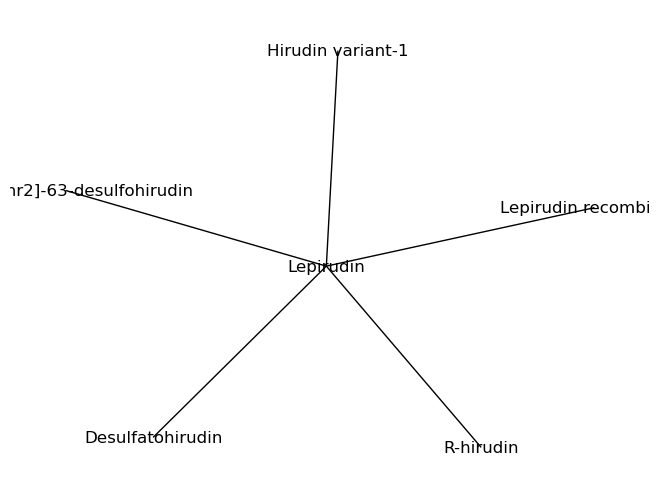

In [ ]:
from bs4 import BeautifulSoup
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import textwrap

with open("drugbank_partial.xml", 'r') as file:
    xml_page = file.read()

soup = BeautifulSoup(xml_page, 'xml')
data = soup.find_all(lambda lek: lek.name == 'drug' and lek.has_attr('xmlns'))
wiersze = []

for lek in data:
    synonimy = lek.find('synonyms').find_all('synonym')
    lek_info = {
        'ID' : lek.find('drugbank-id').text,
        'Name' : lek.find('name').text,
        'Synonimy' : [i.text for i in synonimy]    
    }
    wiersze.append(lek_info)

wynik = pd.DataFrame(wiersze)
def znajdz_synonimy(id):
    syno = wynik[wynik['ID'] == id]['Synonimy']
    name = wynik[wynik['ID'] == id]['Name']
    graph = nx.Graph()
    graph.add_nodes_from(syno[0])
    #graph.add_node(name[0])
    krawedzie = []
    for i in syno[0]:
        if(i != name[0]):
            krawedzie.append((i, name[0]))

    graph.add_edges_from(krawedzie)
    nx.draw(graph, with_labels = True , node_shape = 'v', node_size = 1 )
    plt.show()

znajdz_synonimy('DB00001')